In [16]:
# Custom libraries
from datascienceutils import plotter
from datascienceutils import analyze

# Standard libraries
import json
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
import random

from sklearn import cross_validation
from sklearn import metrics

from bokeh.plotting import figure, show, output_file, output_notebook, ColumnDataSource
from bokeh.charts import Histogram
import bokeh
output_notebook(bokeh.resources.INLINE)

from sqlalchemy import create_engine

Loading BokehJS ...

In [17]:
irisDf = pd.read_csv('./data/Iris.csv')
# Sample Timeseries  picked from here https://www.backblaze.com/b2/hard-drive-test-data.html
hdd2013Df = pd.read_csv('./data/hdd_2013-11-26.csv')

In [18]:
# Create classes for showing off correlation_analyze's heatmapping ability
def createClasses(x):
    rdm = random.random()
    if rdm < 0.3:
        return 'A'
    elif rdm > 0.3 and rdm < 0.6:
        return 'B' 
    else:
        return 'C'
irisDf['Class'] = irisDf['Species'].apply(createClasses)

In [19]:
irisDf.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [20]:
irisDf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa,C
1,2,4.9,3.0,1.4,0.2,Iris-setosa,A
2,3,4.7,3.2,1.3,0.2,Iris-setosa,C
3,4,4.6,3.1,1.5,0.2,Iris-setosa,C
4,5,5.0,3.6,1.4,0.2,Iris-setosa,C


In [21]:
irisDf.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [22]:
irisDf.select_dtypes(include=[np.number]).columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [23]:
analyze.correlation_analyze(irisDf, exclude_columns='Id', 
                                categories=['Species', 'Class'], 
                                measures=['count', 'SepalLengthCm','SepalWidthCm',
                                           'PetalLengthCm', 'PetalWidthCm'])

# Correlation btw Numerical Columns


# Correlation btw Columns Species & Class by count


# Pandas correlation coefficients matrix
                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  
# Pandas co-variance coefficients matrix
                        Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1887.500000      25.782886     -7.492282      67.667785   
SepalLengthCm    25.782886       0.685694     -0.039268       1.273682   
SepalWidthCm     -7.492282      -0.039268      0.188004      -0.321713   
PetalLengthCm  

In [24]:
analyze.dist_analyze(irisDf)

/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:262: UserWarning: Path marker shapes currently not handled, defaulting to Circle
  warnings.warn("Path marker shapes currently not handled, defaulting to Circle")
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:295: UserWarning: Path marker sizes support is limited and may not display as expected
  warnings.warn("Path marker sizes support is limited and may not display as expected")


In [25]:
analyze.dist_analyze(irisDf, 'SepalLengthCm')

/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:262: UserWarning: Path marker shapes currently not handled, defaulting to Circle
  warnings.warn("Path marker shapes currently not handled, defaulting to Circle")
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:295: UserWarning: Path marker sizes support is limited and may not display as expected
  warnings.warn("Path marker sizes support is limited and may not display as expected")


In [26]:
analyze.regression_analyze(irisDf, 'SepalLengthCm', 'SepalWidthCm')

/home/anand/playspace/data-science-utils/datascienceutils/predictiveModels.py:114: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  source = dataframe[column].reshape((len(target), 1))


Regression Score
0.0119616328348


In [27]:
target = irisDf.Species
irisDf.drop(['Species', 'Class'], 1, inplace=True)


In [28]:
irisDf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


For clusters = 2 The average silhouette_score is : 0.620465604655


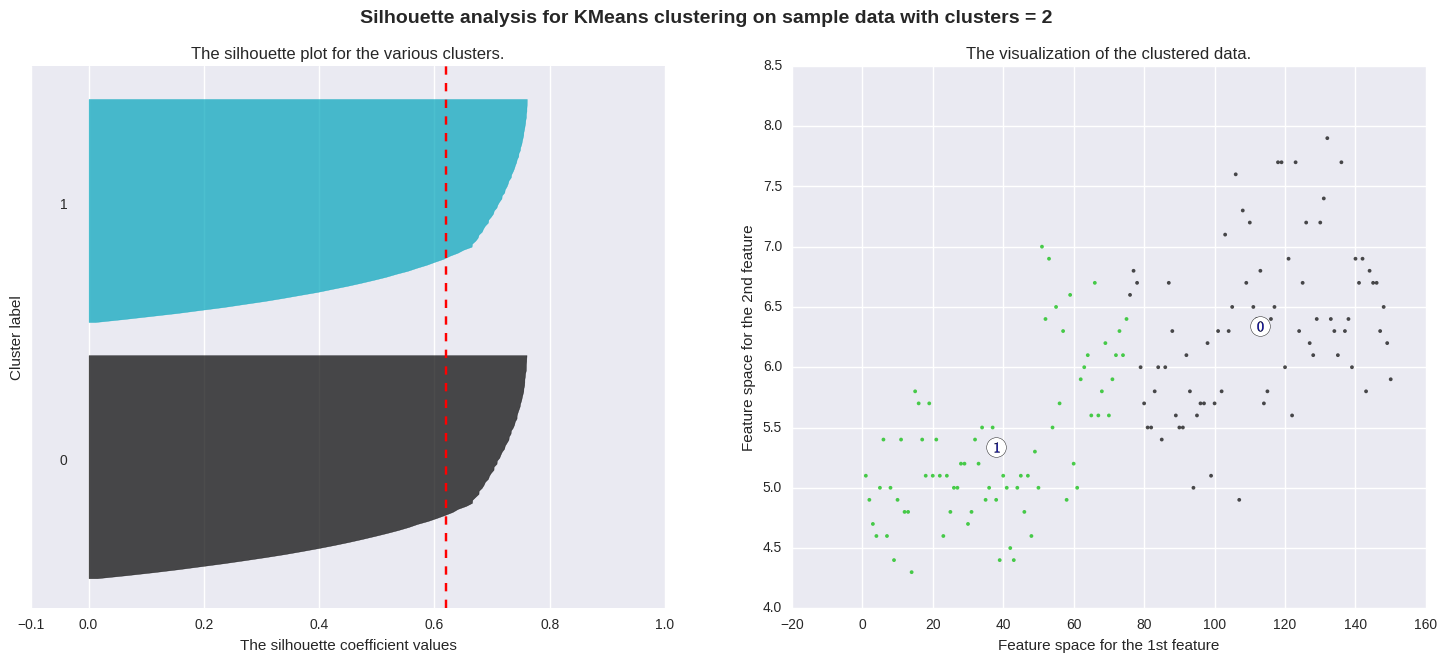

For clusters = 4 The average silhouette_score is : 0.556569210379


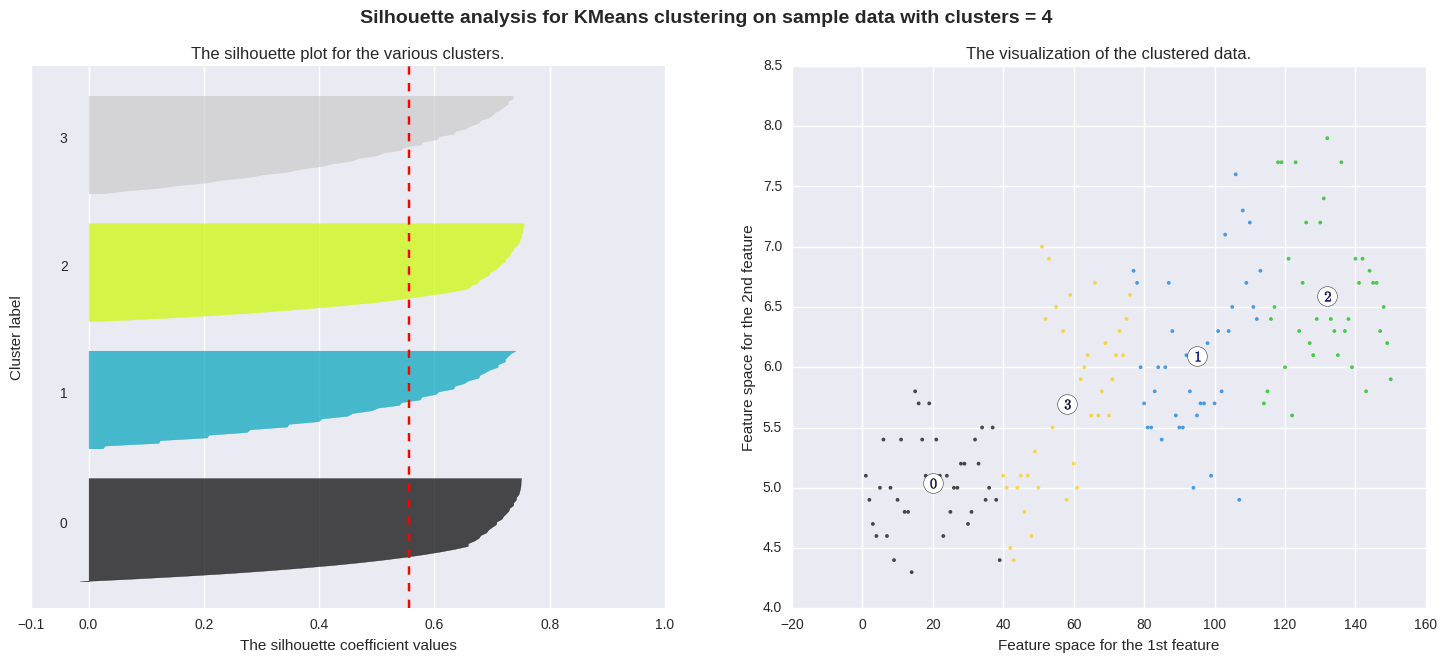

For clusters = 6 The average silhouette_score is : 0.532536501633


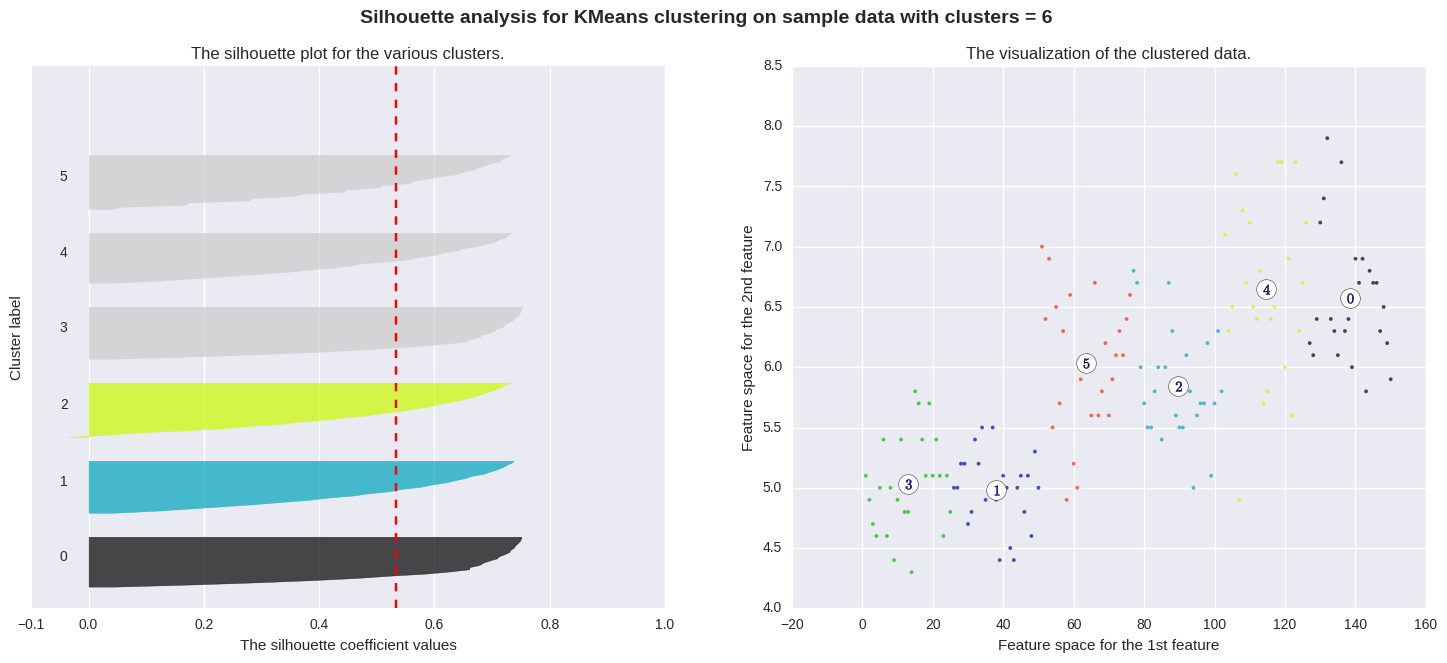

In [29]:
analyze.silhouette_analyze(irisDf, cluster_type='KMeans')

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

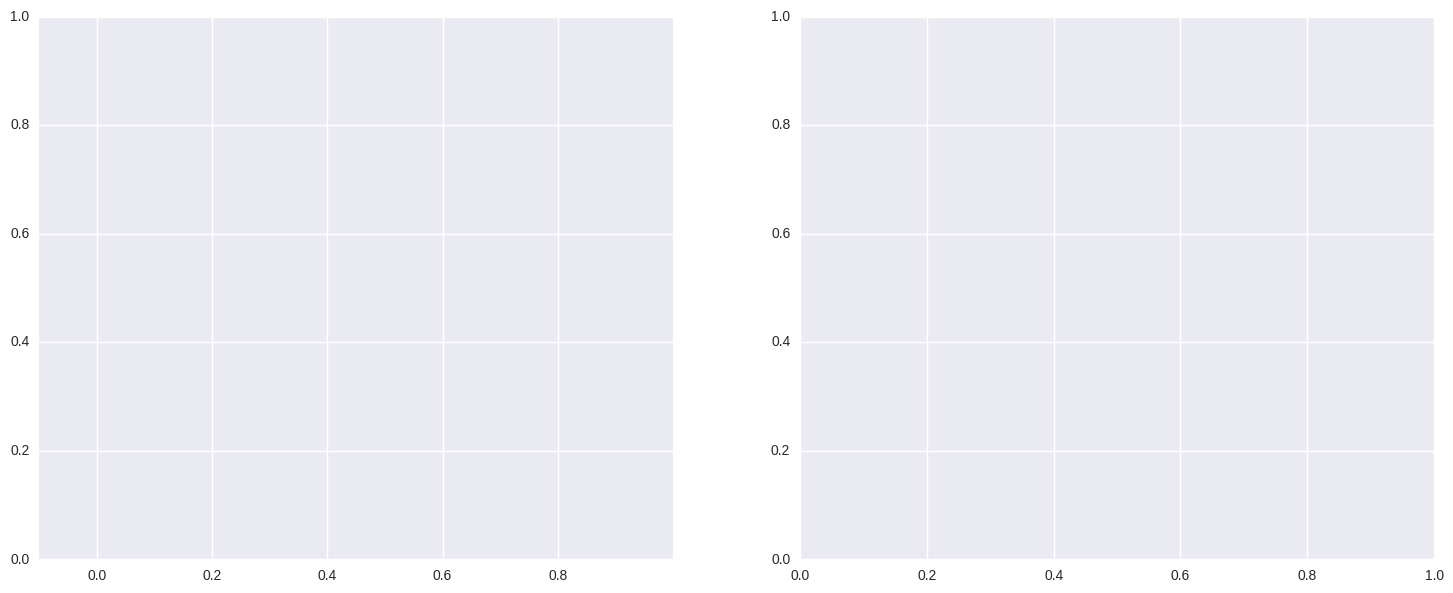

In [30]:
analyze.silhouette_analyze(irisDf, cluster_type='dbscan')

In [ ]:

analyze.silhouette_analyze(irisDf, cluster_type='spectral')

In [ ]:

analyze.silhouette_analyze(irisDf, cluster_type='birch')

In [ ]:
#analyze.som_analyze(df, (10,10), algo_type='som')

In [31]:
hdd2013Df.fillna(value=0, inplace=True)
hdd2013Df.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
count,2.655000e+04,26550.000000,26550.0,2.655000e+04,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0,...,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0
mean,2.895978e+12,0.000151,0.0,5.556346e+07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,8.723011e+11,0.012274,0.0,7.741375e+07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000205e+12,0.000000,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000399e+12,0.000000,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.000593e+12,0.000000,0.0,1.025500e+03,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,4.000787e+12,0.000000,0.0,1.092058e+08,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,4.000787e+12,1.000000,0.0,1.041384e+09,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
hdd2013Df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2013-11-26,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-11-26,MJ0351YNG9Z7LA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-11-26,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-11-26,PL1321LAG34XWH,Hitachi HDS5C4040ALE630,4000787030016,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-11-26,PL1311LAG2205A,Hitachi HDS5C4040ALE630,4000787030016,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
hdd2013Df['date'] = hdd2013Df['date'].astype('datetime64[ns]')

In [34]:
hdd2013Df['date'] = [each + datetime.timedelta(0, i*45) for i, each in enumerate(hdd2013Df.date)]

/home/anand/playspace/data-science-utils/datascienceutils/timeSeriesUtils.py:83: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  new_df = new_df.resample(timeInterval, func)
/home/anand/playspace/data-science-utils/datascienceutils/timeSeriesUtils.py:10: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  calcStatsDf['rollingMean'] = pd.rolling_mean(timeseries, window=12)[valueCol]
/home/anand/playspace/data-science-utils/datascienceutils/timeSeriesUtils.py:11: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  calcStatsDf['rollingSTD']  = pd.rolling_std(timeseries, window=12)[valueCol]


Results of Dickey-Fuller Test:
Test Statistic                -6.208540e+00
p-value                        5.580408e-08
#Lags Used                     1.700000e+01
Number of Observations Used    6.460000e+02
Critical Value (1%)           -3.440513e+00
Critical Value (10%)          -2.569158e+00
Critical Value (5%)           -2.866024e+00
dtype: float64


30s


/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


ValueError: freq T not understood. Please report if you think this in error.

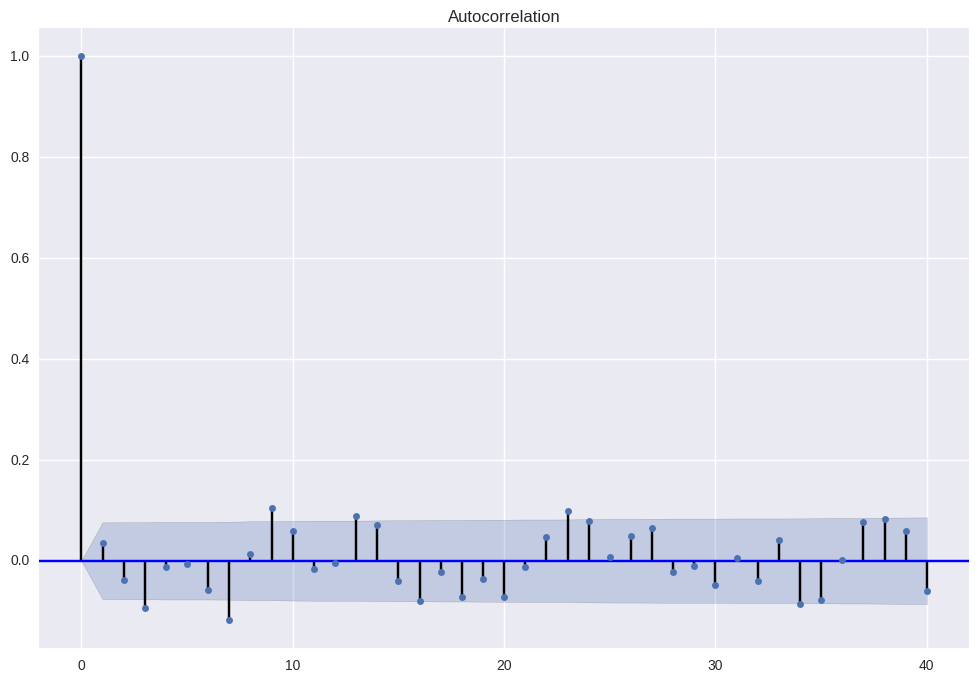

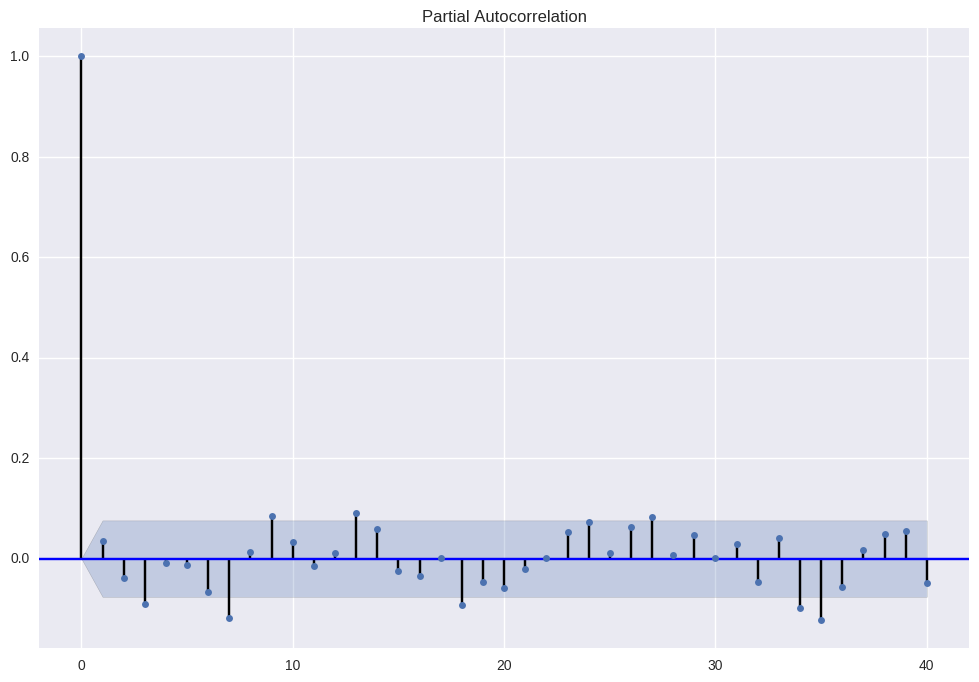

In [35]:
analyze.time_series_analysis(hdd2013Df, timeCol='date', valueCol='smart_1_raw', seasonal={'freq': '30s'})